<center><img src='../../img/ai4eo_logos.jpg' alt='Logos AI4EO MOOC' width='80%'></img></center>

<hr>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./"><< Placeholder 1</a><span style="float:right;"><a href="./">Placeholder 2 >></a></span>

# 3H - Aesthetics Aware Reinforcement Learning for Image Cutting

<i>by Carlos Fortuny-Lombraña, EUMETSAT, Darmstadt, Germany</i>

<hr>

## Watch the video tutorial

In [1]:
from IPython.display import HTML
HTML('<div align="center"><iframe src="https://player.vimeo.com/video/510225048" width="640" height="360" frameborder="0" allow="autoplay; fullscreen; picture-in-picture" allowfullscreen align="middle"></iframe></div>')     

<hr>

## Introduction

<hr>

*Why are we doing this?*

Image cropping is a popular image editing operation that tries to remove well-composed areas from poorly composed images. It has the potential to increase picture visual quality since composition is a key factor in image quality. An effective automated picture cropping algorithm may provide editors with expert guidance while also saving them a significant amount of time. Then, image cutting is an operation that can be linked with object detection and image segmentation.

**Reinforcement learning**-based strategies have been successfully applied in many domains of computer vision, and thus, it is an interesting solution to be applied in many EO use case studies. This machine learning technique is based on learning from the mistakes (trial and error method), similar to the humans do. This is because AI agents should take actions in an environment to maximize the total reward. This type of learning is completely different to the ones shown previously, and one of the EO applications of reinforcement learning can be automatic image cropping using satellite imagery.

<hr>

*What will this workflow show you?* 

This notebook is showing the concept of reinforcement learning applied to EO applications. Then, this workflow guides you through auto-image cutting using [Sentinel-2 imagery data]((https://www.wekeo.eu/data?view=dataset&dataset=EO%3AESA%3ADAT%3ASENTINEL-2%3AMSI). It will lead you through the [A2-RL model architecture](https://github.com/wuhuikai/TF-A2RL) utilized in order to the image cropping process. 

## Machine-Learning Algorithms

In this workflow, you will learn how a reinforcement learning-based method for automatic image cropping can be applied to satellite imagery.

Here, an **A2-RL model**, which is based on the VFN (View Finding Network) model, developed by the *National Laboratory of Pattern Recognition* is utilized. The detailed architecture of the framework is explained later on. The A2-RL  model contains a reinforcement learning agent built for executing the sampled action to shrink the cropping window. Also, the reinforcement learning architecture is composed of **fully connected layers** and an **LSTM** (Long Short-Term Memory) **layer** (for memorizing the historical observations). The algorithm used for image cropping policy is the **asynchronous advantage actor-critic** (A3C). In addition, a **CNN** (Convolutional Neural Network), which is part of supervised learning, will be used for a local feature in the image.

## Data

This workflow uses the following data:
* A pre-trained model [`vfn_rl.pkl`](./vfn_rl.pkl) is utilized. 
* Real satellite images can be retrieved from the [WEkEO Platform](https://www.wekeo.eu/data?view=viewer). With the viewer interface, one can add the
[Sentinel-2 MSI: True color layer](https://www.wekeo.eu/data?view=dataset&dataset=EO%3AESA%3ADAT%3ASENTINEL-2%3AMSI) (`dataset_ID` = 
EO:ESA:DAT:SENTINEL-2:MSI). The Sentinel-2 provides high-resolution optical imagery (Level-1C/Level-2C) which can be applied in the automatic cropping process. The images are collected with the aid of the snipping tool. The two images used are:
    1. Location: [Atokos](https://www.wekeo.eu/data?view=viewer&t=1532692856692&z=0&center=20.81023%2C38.48115&zoom=20.72&layers=W3siaWQiOiJjMCIsImxheWVySWQiOiJFTzpFU0E6REFUOlNFTlRJTkVMLTI6TVNJL19fREVGQVVMVF9fLzFfVFJVRV9DT0xPUiIsInpJbmRleCI6MTB9XQ%3D%3D), Greece - Island. <br />
       Date: 27$^{\text{th}}$ of July 2018.
    2. Location:  [Vesuvius](https://www.wekeo.eu/data?view=viewer&t=1562111376377&z=0&center=14.39623%2C40.81018&zoom=20.94&layers=W3siaWQiOiJjMCIsImxheWVySWQiOiJFTzpFU0E6REFUOlNFTlRJTkVMLTI6TVNJL19fREVGQVVMVF9fLzFfVFJVRV9DT0xPUiIsInpJbmRleCI6MTB9XQ%3D%3D&initial=1), Italy - Volcano.  <br />
       Date : 2$^{\text{nd}}$ of July 2019.

The workflow in this notebook does not contain the process of training. This is because training a deep neural network is computationally expensive, and the use of GPU is needed to speed up. Hence, the running time is being reduced by using pre-trained running. This notebook wants to show how **reinforcement learning** can be applied to Earth observation imagery.

The script shown in this notebook is inspired by: [A2-RL: Aesthetics Aware Reinforcement Learning for Image Cropping](https://github.com/wuhuikai/TF-A2RL) repository.

## Further Resources

A comprehensive of relevant resources to expand your knowledge in reinforcement learning applied to EO applications is listed below:

__Courses:__
* [MIT 6.S191 - Introduction to Deep Learning](http://introtodeeplearning.com/)

__Related Work:__ <a id='related_work'></a>
* [Hierarchical Object Detection with Deep Reinforcement Learning](https://imatge-upc.github.io/detection-2016-nipsws/)
* [PatchDrop - Learning When and Where to Zoom With Deep Reinforcement Learning](https://github.com/ermongroup/PatchDrop)
* [Efficient Object Detection in Large Images with Deep Reinforcement Learning](https://github.com/uzkent/EfficientObjectDetection)
* [Slides Presented in a Seminar on Machine Learning for Remote Sensing Group at the University of Maryland](https://uzkent.github.io/files/Qualcomm.pdf)

__Documentation:__
* [*Agent* Library for Reinforcement Learning in TensorFlow](https://www.tensorflow.org/agents)
* [Reinforcement Learning Algorithms and Environments](https://gym.openai.com/docs/)

__Data:__
* [EuroSat Dataset](https://www.kaggle.com/apollo2506/eurosat-dataset)
* [Airbus Ship Detection Challenge](https://www.kaggle.com/c/airbus-ship-detection)

<hr>

## Notebook outline
* [1 - Introduction to Reinforcement Learning and its applications in EO](#application_EO)
* [2 - Architecture used for automatic image cropping](#image_cropping)
* [3 - Examples using Sentinel-2 images](#sentinel)
* [4 - Conclusions](#conclusions)

<hr>

#### Import libraries

In [2]:
# Remove warning messages
import warnings  # a library to manage warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Python packages
from __future__ import absolute_import # Switch import's behaviour to absolute imports
import os # a library that gives us access to various command line tools to support pathing
import random # a library that implements pseudo-random number generators for various distributions
import pickle # a library that implements binary protocols for serializing and de-serializing a Python object structure (mainly for dictionaries)
import argparse # a recommended command-line parsing Python module
import numpy as np # Python's array manipulation library 
import tensorflow.compat.v1 as tf #Importing the TensorFlow Version 1 for ML
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)  #Remove all the error messages due to TensorFlow
tf.disable_v2_behavior() # Disable Tensorflow Version 2
import skimage.io as io # a library that cointains a collection of algorithms for image processing
from skimage import img_as_ubyte #  a function utilized for converting images to the desired dtype and properly rescale their values
import easydict # a library used to access dictionary values as attributes
import matplotlib.pyplot as plt  # the basic Python plotting library figure tools
import ipyplot # a rich toolkit to help you make the most out of using Python interactively
from IPython.display import Image, display # public API for display tools in IPython

#### Selection of a random seed 

The agent's action can be performed in different orders. Thus, each time the notebook is executed with a constant seed to reproduce the results. 

**Optional**: Play around with the seed number in order to see if the actions taken from the agent are still the same. The default seed used is *3*.

In [3]:
# Use this constant seed
SEED = 3 

os.environ['PYTHONHASHSEED'] = str(SEED)
# `python` built-in pseudo-random generator
random.seed(SEED) 
# numpy pseudo-random generator
np.random.seed(SEED) 
# tensorflow pseudo-random generator
tf.set_random_seed(SEED)  

#### Load helper functions

In [4]:
# Loading function Python script in the same directory
%run ./A2RL-functions.ipynb

<hr>

## 1 - Introduction to Reinforcement Learning and its applications in EO <a id='application_EO'></a>

First of all, **reinforcement learning** is a machine learning approach that allows an agent to learn in an interactive environment through trial and error based on feedback from its own actions and experiences. 

Though both supervised and reinforcement learning use mapping between input and output, unlike supervised learning, which provides feedback to the agent in the form of the correct set of actions for performing a task, reinforcement learning uses rewards and punishment as signals for positive and negative behaviour.  

In terms of goals, reinforcement learning differs from unsupervised learning. While the aim of unsupervised learning is to discover similarities and differences between data points, the goal of reinforcement learning is to create an appropriate action model that maximizes the agent's total cumulative reward. The [diagram](./extra/agent_environment.png) below depicts the core concept and elements of a reinforcement learning model. 

<p align="center">
  <img src=./extra/agent_environment.png />
</p>

In recent years, space organizations and corporations have launched a considerable number of **EO satellites**. End consumers are bombarded with a massive quantity of images of diverse nature, such as optical vs. radar, high-resolution vs. wide-coverage, mono- vs. multi-spectral, often in regular time series. Fully automated analytic approaches, which require new tools to extract reliable and expressive information, are critical to their full use. 

Reinforcement learning offers considerable potential for meeting the difficult demands of **remote sensing (RS) image processing**.
It makes use of the massive computational capacity of current **GPUs** to do human-like reasoning and extract compact characteristics that encapsulate the semantics of input pictures. The RS community's interest in **deep reinforcement learning** approaches is **expanding** rapidly, and numerous architectures have been developed in recent years to handle RS challenges, frequently with exceptional performance. 

The following are some of the major subjects of interest in EO, but they are by no means exhaustive: 

- Large-scale datasets for training and testing deep reinforcement learning solutions to RS problems.
- Deep reinforcement learning for RS image understanding (e.g., semantic labelling, object detection, data mining, image retrieval).
- Deep reinforcement learning for RS image processing (e.g., compression, denoising, segmentation, classification).
- Deep reinforcement learning for RS data fusion (e.g., optical-SAR fusion, pan-sharpening).

In case you are curious about object detection, please take a look at the [Related Work](#related_work). Stanford University and Barcelona Supercomputing Center are significantly researching object detection in images guided by a deep reinforcement learning agent. The key idea is to focus on those parts of the image that contain richer information and zoom on them. In addition, there is an extensive research everything related to YOLO architecture as it is a very succesfull real-time object detection model.

Let's take a look at this **automatic image cropping** to understand more about **reinforcement learning**. 

## 2 - Architecture used for automatic image cropping <a id='image_cropping'></a>

The model for **A2-RL** can be designed as an sequential decision-making process, and therefore, an agent interacts with the environment, and takes a series of actions to maximize the accumulated reward. Image cropping methods can be divided into two classes, attention-based and aesthetics-based methods. Here, the reward will be based on aesthetics.

The diagram below illustrates the difference between the two classes.

![image](./extra/attention_aesthetics.png)

For this specific problem, the agent receives observations from the input image and the cropping window. The action is then sampled from the action space based on the observation and historical experience. The sampled action is executed by the agent to change the form and position of the cropping window. After each action, the agent is rewarded based on the aesthetic score of the cropped image. By maximizing the cumulative reward, the agent attempts to identify the most appealing window in the original image. 

This architecture, as previously stated, has two learning approaches. A 5-layer **CNN** and a fully-connected layer that generates a 1000-dimensional vector are used for the feature representation or cropping window. This section can be classified as weakly supervised learning. The model then divides into two branches: the actor-critic branch and the aesthetic quality evaluation branch. The actor-critic branch is made up of **three fully-connected layers** as well as a **LSTM layer**. The actor-critic branch has two outputs: the policy output, which is also known as **Actor**, and the value output, which is also known as **Critic**. The **asynchronous advantage actor-critic** algorithm is utilized for image cropping policy (A3C). The policy output is a fourteen-dimensional vector, with each dimension representing the likelihood of performing appropriate action. The value output is the current state estimation, which is the predicted cumulative reward in the present scenario. The aesthetic quality evaluation branch generates an aesthetic quality score for the cropped image, which is then utilized to calculate the reward. 

In this model, both the global feature and the local feature are 1000-dim vectors, three fully-connected layers and the LSTM layer all output 1024-dim feature vectors. The detailed illustration of the **A2-RL** model architecture is shown below:

![image](./extra/framework.png)

The two most important functions, `vfn_rl` and `auto_cropping`, are shown and explained in this notebook. The remainder of the functions are located in another [notebook](./A2RL-functions.ipynb).

### <a id='crop_input'></a> `vfn_rl`

Here is where the layers of the architecture are defined. The detailed characteristics of each layer are commented along the script with `#`.

First, the layers of the CNN are construed. Each layer contains a rectified linear unit activation function (ReLU). Then, the vectors inputs are normalized independently, and a max pooling on the input is performed.

In the actor-critic branch, the three-fully connected layers have as well a ReLU activation function. Instead, the LSTM layer contains a sigmoid activation function. 

In [5]:
def vfn_rl(x, variable_dict, global_feature=None, h=None, c=None, embedding_dim=1000):
    ########################## VFN ##################################
    ######################## Layer 1 ################################
    ## conv1
    #  conv(11, 11, 96, 4, 4, padding='VALID', name='conv1')
    k_h = 11; k_w = 11; c_o = 96; s_h = 4; s_w = 4
    conv1W = variable_dict["c1w"]
    conv1b = variable_dict["c1b"]
    conv1_in = conv(x, conv1W, conv1b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=1)
    conv1 = tf.nn.relu(conv1_in)
    ## lrn1
    #  lrn(2, 2e-05, 0.75, name='norm1')
    radius = 2; alpha = 2e-05; beta = 0.75; bias = 1.0
    lrn1 = tf.nn.local_response_normalization(conv1,
                                              depth_radius=radius,
                                              alpha=alpha,
                                              beta=beta,
                                              bias=bias)
    ## maxpool1
    #  max_pool(3, 3, 2, 2, padding='VALID', name='pool1')
    k_h = 3; k_w = 3; s_h = 2; s_w = 2; padding = 'VALID'
    maxpool1 = tf.nn.max_pool(lrn1, ksize=[1, k_h, k_w, 1], strides=[1, s_h, s_w, 1], padding=padding)

    ######################## Layer 2 ################################
    ## conv2
    #  conv(5, 5, 256, 1, 1, group=2, name='conv2')
    k_h = 5; k_w = 5; c_o = 256; s_h = 1; s_w = 1; group = 2
    conv2W = variable_dict["c2w"]
    conv2b = variable_dict["c2b"]
    conv2_in = conv(maxpool1, conv2W, conv2b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
    conv2 = tf.nn.relu(conv2_in)
    ## lrn2
    #  lrn(2, 2e-05, 0.75, name='norm2')
    radius = 2; alpha = 2e-05; beta = 0.75; bias = 1.0
    lrn2 = tf.nn.local_response_normalization(conv2,
                                              depth_radius=radius,
                                              alpha=alpha,
                                              beta=beta,
                                              bias=bias)
    ## maxpool2
    #  max_pool(3, 3, 2, 2, padding='VALID', name='pool2')
    k_h = 3; k_w = 3; s_h = 2; s_w = 2; padding = 'VALID'
    maxpool2 = tf.nn.max_pool(lrn2, ksize=[1, k_h, k_w, 1], strides=[1, s_h, s_w, 1], padding=padding)

    ######################## Layer 3 ################################
    ## conv3
    #  conv(3, 3, 384, 1, 1, name='conv3')
    k_h = 3; k_w = 3; c_o = 384; s_h = 1; s_w = 1; group = 1
    conv3W = variable_dict["c3w"]
    conv3b = variable_dict["c3b"]
    conv3_in = conv(maxpool2, conv3W, conv3b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
    conv3 = tf.nn.relu(conv3_in)

    ######################## Layer 4 ################################
    ## conv4
    #  conv(3, 3, 384, 1, 1, group=2, name='conv4')
    k_h = 3; k_w = 3; c_o = 384; s_h = 1; s_w = 1; group = 2
    conv4W = variable_dict["c4w"]
    conv4b = variable_dict["c4b"]
    conv4_in = conv(conv3, conv4W, conv4b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
    conv4 = tf.nn.relu(conv4_in)

    ######################## Layer 5 ################################
    ## conv5
    #  conv(3, 3, 256, 1, 1, group=2, name='conv5')
    k_h = 3; k_w = 3; c_o = 256; s_h = 1; s_w = 1; group = 2
    conv5W = variable_dict["c5w"]
    conv5b = variable_dict["c5b"]
    conv5_in = conv(conv4, conv5W, conv5b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
    conv5 = tf.nn.relu(conv5_in)
    ## maxpool5
    #  max_pool(3, 3, 2, 2, padding='VALID', name='pool5')
    with tf.variable_scope("conv5"):
        k_h = 3; k_w = 3; s_h = 2; s_w = 2; padding = 'VALID'
        maxpool5 = tf.nn.max_pool(conv5, ksize=[1, k_h, k_w, 1], strides=[1, s_h, s_w, 1], padding=padding)
        bn5 = keras.layers.Flatten()(maxpool5)

    ####################### Layer 6 ################################
    fc6W =  variable_dict["fc6w"]
    fc6b = variable_dict["fc6b"]
    fc6 = tf.nn.relu_layer(bn5, fc6W, fc6b)

    if global_feature is None:
        return fc6

    ########################### RL ##################################
    x_rl = tf.concat([global_feature, fc6], axis=1)
    ############## Layer 1 #################
    fc1W = variable_dict['fc1.weight'].T
    fc1b = variable_dict['fc1.bias']
    fc1 = tf.nn.relu_layer(x_rl, fc1W, fc1b)

    ############## Layer 2 #################
    fc2W = variable_dict['fc2.weight'].T
    fc2b = variable_dict['fc2.bias']
    fc2 = tf.nn.relu_layer(fc1, fc2W, fc2b)

    ############## Layer 3 #################
    fc3W = variable_dict['fc3.weight'].T
    fc3b = variable_dict['fc3.bias']
    fc3 = tf.nn.relu_layer(fc2, fc3W, fc3b)

    ############## LSTM #################
    W = tf.matmul(fc3, variable_dict['lstm.weight_ih'].T) + variable_dict['lstm.bias_ih'] +\
        tf.matmul(h, variable_dict['lstm.weight_hh'].T) + variable_dict['lstm.bias_hh']
    i, f, g, o = tf.split(W, 4, axis=1)
    i = tf.sigmoid(i); f = tf.sigmoid(f); g = tf.tanh(g); o = tf.sigmoid(o);
    c = f*c + i*g
    h = o*tf.tanh(c)

    ############## Action #################
    action1w = variable_dict['action_fc.weight'].T
    action1b = variable_dict['action_fc.bias']
    action = tf.multinomial(tf.matmul(h, action1w) + action1b, 1)

    return action, h, c

### <a id='crop_input'></a> `auto_cropping`

Here is where the termination action is selected. The agent will terminate the cropping operation and output the current cropping window as the final result. As the model learns when to halt the cropping process on its own, it may stop when the score no longer increases in order to obtain the optimal cropping window. The agent can theoretically cover  windows with almost arbitrary size and position on the original image.

In [6]:
def auto_cropping(origin_image):
    batch_size = len(origin_image)
    terminals = np.zeros(batch_size)
    ratios = np.repeat([[0, 0, 20, 20]], batch_size, axis=0)
    img = crop_input(origin_image, generate_bbox(origin_image, ratios))

    global_feature = sess.run(global_feature_placeholder, feed_dict={image_placeholder: img})
    h_np = np.zeros([batch_size, 1024])
    c_np = np.zeros([batch_size, 1024])
    
    while True:
        action_np, h_np, c_np = sess.run((action, h, c), feed_dict={image_placeholder: img,
                                                                    global_feature_placeholder: global_feature,
                                                                    h_placeholder: h_np,
                                                                    c_placeholder: c_np})
        #print(action_np,h_np,c_np)
        ratios, terminals = command2action(action_np, ratios, terminals)
        #print(np.sum(terminals),batch_size,ratios)
        bbox = generate_bbox(origin_image, ratios)
        if np.sum(terminals) == batch_size:
            return bbox
        
        img = crop_input(origin_image, bbox)  

Illustration of the sequential decision-making based automatic cropping process is showing below with an image of a tree.

![image](./extra/steps.png)

## 3 - Examples using Sentinel-2 images <a id='sentinel'></a>

In this section, we will use two images captured from the Sentinel-2 satellite, and see if it crops and tries to detect something. It is important to remember that Sentinel-2 can be used to map changes in land cover and to monitor the world's forests. Before diving into the two EO examples, the session needs to be started and the pre-trained model has to be imported.

### Loading the pre-trained model

Below, the pre-trained model is imported by loading `vfn_rl.pkl`. 

In [7]:
global_dtype = tf.float32

with open('vfn_rl.pkl', 'rb') as f:
    var_dict = pickle.load(f)

image_placeholder = tf.placeholder(dtype=global_dtype, shape=[None,227,227,3])
global_feature_placeholder = vfn_rl(image_placeholder, var_dict)

h_placeholder = tf.placeholder(dtype=global_dtype, shape=[None,1024])
c_placeholder = tf.placeholder(dtype=global_dtype, shape=[None,1024])
action, h, c = vfn_rl(image_placeholder, var_dict, global_feature=global_feature_placeholder,
                                                           h=h_placeholder, c=c_placeholder)


<a id='instruction'></a>

After the pre-trained model is successfully loaded, the session can be launched by using `tf.Session()`. Then, it is important to define the `image_path` and the `save_path`. The `image_path` is the location of the source image, and the `save_path` is the location where you would like to save the cropped image. It is important to note that `image_path` and `save_path` are attributes that each time need to be specified. 

For each iteration, the source image is loaded and it is normalized by dividing 255. This is because the RGB additive color model is utilized. Then, the new dimensions of the cropped image are defined.  The agent's actions adjust the shape and position by 0.05 times of the original image size, which could capture more accurate cropping windows than a large scale. Following that, the new image is saved in the location mentioned in `save_path`. 

The code in order to launch a session is illustrated below:

```
image_path = `IMAGE_PATH`
save_path = `CROPPED_IMAGE_PATH`

sess = tf.Session() 

args = easydict.EasyDict({
        "image_path": image_path,
        "save_path": save_path
})

im = io.imread(args.image_path).astype(np.float32) / 255
xmin, ymin, xmax, ymax = auto_cropping([im - 0.5])[0]
io.imsave(args.save_path, img_as_ubyte(im[ymin:ymax, xmin:xmax]))
```

### Atokos, Greece - Island

Here, the source image captured from Sentinel-2 on the 27$^{\text{th}}$ of July 2018 is illustrating a Greek Island, denoted Atokos. The source image is displayed below:

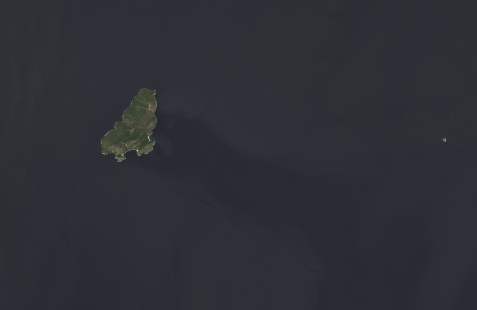

In [8]:
display(Image(filename='test_images/GreekIsland07-27-2018-0.png'))

Several iterations are performed in order to understand whether the agent is taking the correct decisions, and see if detects the island. As there is not a large amount of noise and the color of the water is almost the same, the agent should crop the image correctly. After a couple of iterations, all the images are collected to see the steps performed by the agent.

#### **Iteration 1** <a id='island-it1'></a>

Here, we follow the [instructions](#instruction) explained before. The `image_path` is the location of the source image, and the `save_path` is the location of the new cropped image.

In [9]:
image_path = './test_images/GreekIsland07-27-2018-0.png'
save_path = './test_images/GreekIsland07-27-2018-1.png'

sess = tf.Session() 

args = easydict.EasyDict({
        "image_path": image_path,
        "save_path": save_path
})

im = io.imread(args.image_path).astype(np.float32) / 255
xmin, ymin, xmax, ymax = auto_cropping([im - 0.5])[0]
io.imsave(args.save_path, img_as_ubyte(im[ymin:ymax, xmin:xmax]))

The first iteration has been executed, and one would like to see the result of the new cropped image. This is shown below.

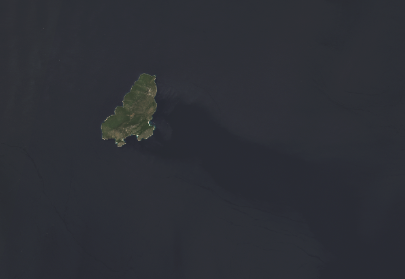

In [10]:
display(Image(filename='test_images/GreekIsland07-27-2018-1.png'))

The agent seems that has performed the correct action, and thus another iteration will be executed.

#### **Iteration 2** <a id='island-it2'></a>

For this iteration, the `image_path` will be the `save_path` of [Iteration 1](#island-it1). This is because we would like to see whether the agent tries to zoom the island. A different `save_path` is defined for the new cropped image.

In [11]:
image_path = './test_images/GreekIsland07-27-2018-1.png'
save_path = './test_images/GreekIsland07-27-2018-2.png'

sess = tf.Session() 

args = easydict.EasyDict({
        "image_path": image_path,
        "save_path": save_path
})

im = io.imread(args.image_path).astype(np.float32) / 255
xmin, ymin, xmax, ymax = auto_cropping([im - 0.5])[0]
io.imsave(args.save_path, img_as_ubyte(im[ymin:ymax, xmin:xmax]))

The second iteration has been executed, and one would like to see the result of the new cropped image. This is shown below.

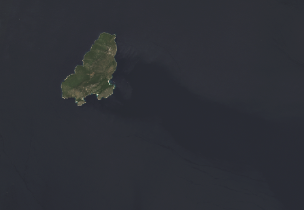

In [12]:
display(Image(filename='test_images/GreekIsland07-27-2018-2.png'))

Again, the agent seems that has performed the correct action, and thus another iteration will be executed.

#### **Iteration 3** <a id='island-it3'></a>

For this iteration, the `image_path` will be the `save_path` of [Iteration 2](#island-it2). This is because we would like to see whether the agent tries to zoom the island. A different `save_path` is defined for the new cropped image.

In [24]:
image_path = './test_images/GreekIsland07-27-2018-2.png'
save_path = './test_images/GreekIsland07-27-2018-3.png'

sess = tf.Session() 

args = easydict.EasyDict({
        "image_path": image_path,
        "save_path": save_path
})

im = io.imread(args.image_path).astype(np.float32) / 255
xmin, ymin, xmax, ymax = auto_cropping([im - 0.5])[0]
io.imsave(args.save_path, img_as_ubyte(im[ymin:ymax, xmin:xmax]))

The third iteration has been executed, and one would like to see the result of the new cropped image. This is shown below.

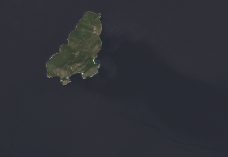

In [14]:
display(Image(filename='test_images/GreekIsland07-27-2018-3.png'))

One more time, the agent has zoomed correctly into the island. Hence, now we combine all the four images and see whether the amount of water has been decreased.

#### **Combining all iterations**

Here, the initial source image with the three new cropped images are illustrated.

In [15]:
images_filepath = []
for image in range(0,4):
    images_filepath.append('test_images/GreekIsland07-27-2018-'+str(image)+'.png')
    
ipyplot.plot_images(images_filepath, max_images=20, img_width=275);




## Vesuvius, Italy - Volcano

Here, the source image captured from Sentinel-2 on the 2$^\text{nd}$ of July 2019 is illustrating an Italian Volcano, named Vesuvius. The source image is displayed below:

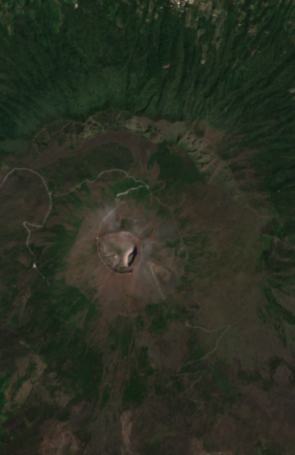

In [16]:
display(Image(filename='test_images/Vesuvius02-07-2019-0.png'))

Several iterations are performed in order to understand whether the agent is taking the correct decisions, and see if detects the crater of the volcano. This time, there is more noise than the previous example. Thus, the agent should have more difficulties in cropping the image correctly. After a couple of iterations, all the images are collected to see the steps performed by the agent.

#### **Iteration 1** <a id='volcano-it1'></a>

Here, we follow the [instructions](#instruction) explained before. The `image_path` is the location of the source image, and the `save_path` is the location of the new cropped image.

In [17]:
image_path = './test_images/Vesuvius02-07-2019-0.png'
save_path = './test_images/Vesuvius02-07-2019-1.png'

sess = tf.Session() 

args = easydict.EasyDict({
        "image_path": image_path,
        "save_path": save_path
})

im = io.imread(args.image_path).astype(np.float32) / 255
xmin, ymin, xmax, ymax = auto_cropping([im - 0.5])[0]
io.imsave(args.save_path, img_as_ubyte(im[ymin:ymax, xmin:xmax]))

The first iteration has been executed, and one would like to see the result of the new cropped image. This is shown below.

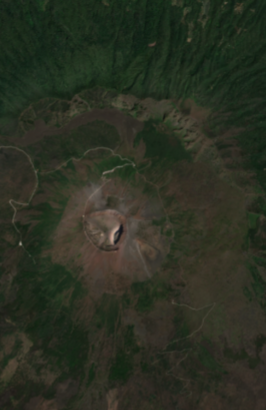

In [18]:
display(Image(filename='test_images/Vesuvius02-07-2019-1.png'))

The agent seems that has performed the correct action, and thus another iteration will be executed.

#### **Iteration 2** <a id='volcano-it2'></a>

For this iteration, the `image_path` will be the `save_path` of [Iteration 1](#volcano-it1). This is because we would like to see whether the agent tries to zoom the crater of the volcano. A different `save_path` is defined for the new cropped image.

In [19]:
image_path = './test_images/Vesuvius02-07-2019-1.png'
save_path = './test_images/Vesuvius02-07-2019-2.png'

sess = tf.Session() 

args = easydict.EasyDict({
        "image_path": image_path,
        "save_path": save_path
})

im = io.imread(args.image_path).astype(np.float32) / 255
xmin, ymin, xmax, ymax = auto_cropping([im - 0.5])[0]
io.imsave(args.save_path, img_as_ubyte(im[ymin:ymax, xmin:xmax]))

The second iteration has been executed, and one would like to see the result of the new cropped image. This is shown below.

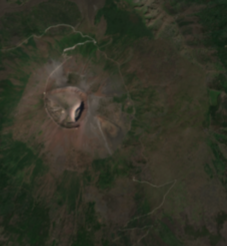

In [20]:
display(Image(filename='test_images/Vesuvius02-07-2019-2.png'))

Again, the agent seems that has performed the correct action, and thus another iteration will be executed.

#### **Iteration 3** <a id='volcano-it3'></a>

For this iteration, the `image_path` will be the `save_path` of [Iteration 2](#volcano-it2). This is because we would like to see whether the agent tries to zoom the crater of the volcano. A different `save_path` is defined for the new cropped image.

In [21]:
image_path = './test_images/Vesuvius02-07-2019-2.png'
save_path = './test_images/Vesuvius02-07-2019-3.png'

sess = tf.Session() 

args = easydict.EasyDict({
        "image_path": image_path,
        "save_path": save_path
})

im = io.imread(args.image_path).astype(np.float32) / 255
xmin, ymin, xmax, ymax = auto_cropping([im - 0.5])[0]
io.imsave(args.save_path, img_as_ubyte(im[ymin:ymax, xmin:xmax]))

The third iteration has been executed, and one would like to see the result of the new cropped image. This is shown below.

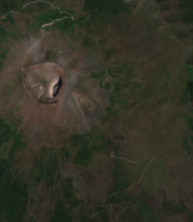

In [22]:
display(Image(filename='test_images/Vesuvius02-07-2019-3.png'))

One more time, the agent has zoomed correctly into the island. Hence, now we combine all the four images and see whether the amount of water has been decreased.

#### **Combining all iterations**

Here, the initial source image with the three new cropped images are illustrated.

In [23]:
images_filepath = []
for image in range(0,4):
    images_filepath.append('test_images/Vesuvius02-07-2019-'+str(image)+'.png')
    
ipyplot.plot_images(images_filepath, max_images=20, img_width=250);

## 4 - Conclusions <a id='conclusions'></a>

- Explain the benefits of reinforcement learning in EO

- Why this is useful?

- Play around with adding new pictures taken from WEkEO and see if the auto-cropping is performed correctly, or increase the number of iterations



<hr>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./"><< Placeholder 1</a><span style="float:right;"><a href="./">Placeholder 2 >></a></span>

<hr>

<img src='../../../img/copernicus_logo.png' alt='Copernicus logo' align='left' width='20%'></img>

Course developed for [EUMETSAT](https://www.eumetsat.int/), [ECMWF](https://www.ecmwf.int/) and [Mercator Ocean International](https://www.mercator-ocean.fr/en/) in support of the [EU’s Copernicus Programme](https://www.copernicus.eu/en) and the [WEkEO platform](https://wekeo.eu/).
